# Tarefas de Classificação


## Estudo de caso: dados sobre o censo de 1994 dos EUA
Este dataset contém dados coletados pelo censo norte americano de 1994, contendo atributos sobre cada pessoa intrevistada, sendo que o último deles indica se a pessoa possuia renda maior ou menor do que $50.000,00 anuais.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Separando os conjuntos de treino e teste

In [2]:
from sklearn.model_selection import train_test_split

# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['class'].copy()
df_treino        = df_treino.drop(columns='class')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['class'].copy()
df_teste        = df_teste.drop(columns='class')

### Pré-processamento

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Atributos escolhidos:
nomes_atributos_numericos   = ['age','fnlwgt','education-num','capital-gain',
                               'capital-loss','hours-per-week']
nomes_atributos_categoricos = ['workclass','education','occupation','relationship',
                               'marital-status','race','sex','native-country']

pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

In [4]:
# Coluna alvo para os conjuntos de treino e teste
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

In [5]:
y_treino

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [6]:
X_treino.shape

(26048, 108)

In [7]:
y_treino.shape

(26048,)

In [8]:
X_teste.shape

(6513, 108)

In [9]:
y_teste.shape

(6513,)

## Regressão Logística com SKLearn

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)

log_reg.fit(X_treino, y_treino)
log_reg.classes_

array(['<=50K', '>50K'], dtype=object)

### Probabilidade estimada pela regressão logística

In [11]:
y_probabilidade_reglog = log_reg.predict_proba(X_teste)
np.round(y_probabilidade_reglog,decimals=2)

array([[0.98, 0.02],
       [0.55, 0.45],
       [0.33, 0.67],
       ...,
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.99, 0.01]])

### Previsões pela regressão logística

In [12]:
y_previsto_reglog = log_reg.predict(X_teste)
y_previsto_reglog

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [13]:
y_teste

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

### Acurácia pela regressão logística

In [14]:
y_teste, y_teste.shape

(array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
       dtype=object),
 (6513,))

In [15]:
acertos_reglog = y_previsto_reglog == y_teste
acertos_reglog

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
valores_reglog, quantidades_reglog = np.unique(acertos_reglog, return_counts=True)
print(np.asarray((valores_reglog, quantidades_reglog)))

[[   0    1]
 [ 923 5590]]


In [17]:
print("Acurácia: ", quantidades_reglog[1]/y_teste.shape[0])

Acurácia:  0.8582834331337326


## Árvore de Decisão  com SKLearn

In [56]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth=2)
arvore.fit(X_treino, y_treino)
arvore.classes_

array(['<=50K', '>50K'], dtype=object)

### Probabilidade estimada pela árvore de decisão

In [57]:
y_probabilidade_arvore = arvore.predict_proba(X_teste)
np.round(y_probabilidade_arvore,decimals=2)

array([[0.95, 0.05],
       [0.67, 0.33],
       [0.28, 0.72],
       ...,
       [0.28, 0.72],
       [0.95, 0.05],
       [0.95, 0.05]])

### Previsões pela árvore de decisão

In [58]:
y_previsto_arvore = arvore.predict(X_teste)
y_previsto_arvore

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [59]:
acertos_arvore = y_previsto_arvore == y_teste
acertos_arvore

array([ True,  True,  True, ...,  True,  True,  True])

In [60]:
valores_arvore, quantidades_arvore = np.unique(acertos_arvore, return_counts=True)
print(np.asarray((valores_arvore, quantidades_arvore)))

[[   0    1]
 [1120 5393]]


### Acurácia pela árvore de decisão

In [61]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore))

Acurácia:  0.828036235221864


### Visualização da árvore de decisão

In [62]:
nomes_atributos = np.append( nomes_atributos_numericos, 
                             preproc_completo.named_transformers_['categoricos'].get_feature_names())

[Text(669.6, 543.6, 'x4_Married-civ-spouse <= 0.5\ngini = 0.366\nsamples = 100.0%\nvalue = [0.759, 0.241]\nclass = <=50K'),
 Text(334.8, 326.16, 'capital-gain <= 0.833\ngini = 0.119\nsamples = 53.8%\nvalue = [0.936, 0.064]\nclass = <=50K'),
 Text(167.4, 108.72000000000003, 'gini = 0.091\nsamples = 52.9%\nvalue = [0.952, 0.048]\nclass = <=50K'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.07\nsamples = 0.9%\nvalue = [0.036, 0.964]\nclass = >50K'),
 Text(1004.4000000000001, 326.16, 'education-num <= 0.94\ngini = 0.494\nsamples = 46.2%\nvalue = [0.553, 0.447]\nclass = <=50K'),
 Text(837.0, 108.72000000000003, 'gini = 0.443\nsamples = 32.4%\nvalue = [0.668, 0.332]\nclass = <=50K'),
 Text(1171.8, 108.72000000000003, 'gini = 0.404\nsamples = 13.8%\nvalue = [0.281, 0.719]\nclass = >50K')]

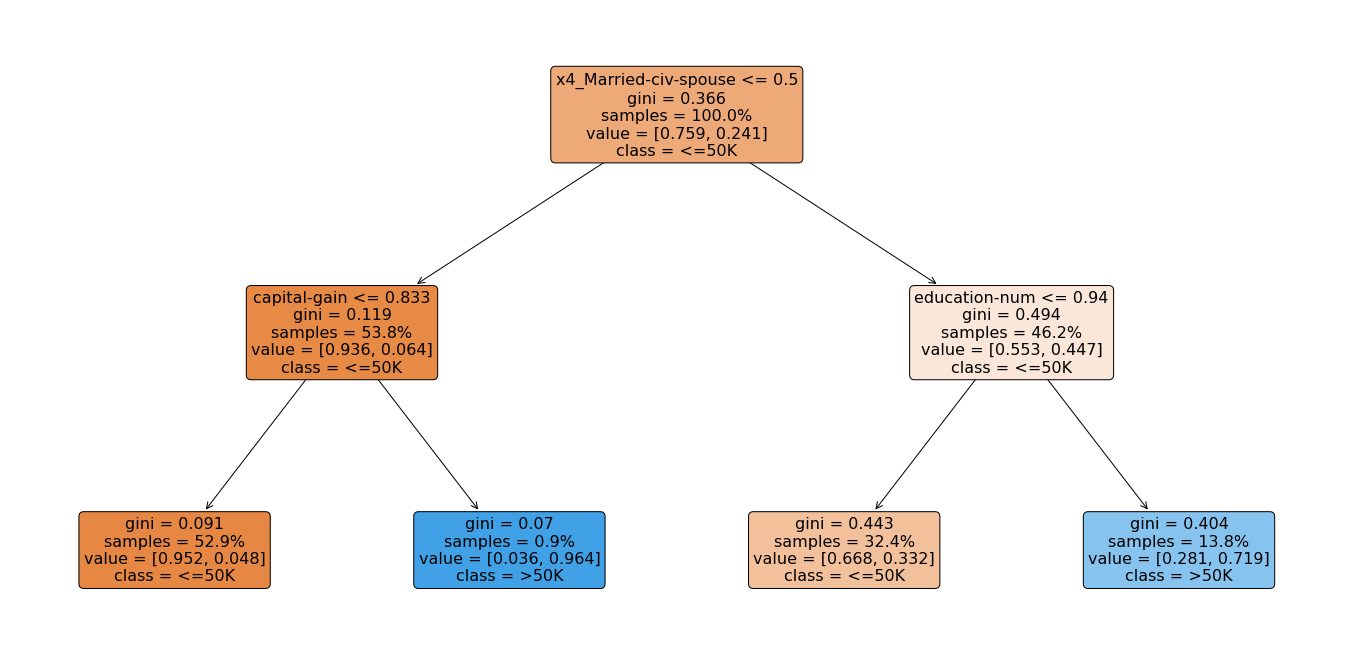

In [63]:
from sklearn import tree

plt.figure(figsize=(24,12))

tree.plot_tree(arvore,
               feature_names=nomes_atributos,
               class_names=arvore.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=16)

## Árvore de decisão sem pré-processamento dos atributos numéricos
Eliminaremos o pre-processamento dos atributos numéricos, mas manteremos o pré-processsamento dos atributos categóricos. A implementação do SKLearn não suporta atributos categóricos. 

In [64]:
preproc_completo_2 = ColumnTransformer([
    ('numericos',   'passthrough',    nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),  nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino_tree = preproc_completo_2.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste_tree = preproc_completo_2.transform(df_teste)

In [65]:
arvore_2 = DecisionTreeClassifier(max_depth=2)
arvore_2.fit(X_treino_tree, y_treino)
arvore_2.classes_

array(['<=50K', '>50K'], dtype=object)

In [66]:
y_probabilidade_arvore_2 = arvore_2.predict_proba(X_teste_tree)
np.round(y_probabilidade_arvore_2,decimals=2)

array([[0.95, 0.05],
       [0.67, 0.33],
       [0.28, 0.72],
       ...,
       [0.28, 0.72],
       [0.95, 0.05],
       [0.95, 0.05]])

In [67]:
y_previsto_arvore_2 = arvore_2.predict(X_teste_tree)
y_previsto_arvore_2

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [68]:
acertos_arvore_2 = y_previsto_arvore_2 == y_teste
acertos_arvore_2

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
valores_arvore_2, quantidades_arvore_2 = np.unique(acertos_arvore_2, return_counts=True)
print(np.asarray((valores_arvore_2, quantidades_arvore_2)))

[[   0    1]
 [1120 5393]]


In [70]:
print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore_2))

Acurácia:  0.828036235221864


[Text(669.6, 543.6, 'x4_Married-civ-spouse <= 0.5\ngini = 0.366\nsamples = 100.0%\nvalue = [0.759, 0.241]\nclass = <=50K'),
 Text(334.8, 326.16, 'capital-gain <= 7073.5\ngini = 0.119\nsamples = 53.8%\nvalue = [0.936, 0.064]\nclass = <=50K'),
 Text(167.4, 108.72000000000003, 'gini = 0.091\nsamples = 52.9%\nvalue = [0.952, 0.048]\nclass = <=50K'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.07\nsamples = 0.9%\nvalue = [0.036, 0.964]\nclass = >50K'),
 Text(1004.4000000000001, 326.16, 'education-num <= 12.5\ngini = 0.494\nsamples = 46.2%\nvalue = [0.553, 0.447]\nclass = <=50K'),
 Text(837.0, 108.72000000000003, 'gini = 0.443\nsamples = 32.4%\nvalue = [0.668, 0.332]\nclass = <=50K'),
 Text(1171.8, 108.72000000000003, 'gini = 0.404\nsamples = 13.8%\nvalue = [0.281, 0.719]\nclass = >50K')]

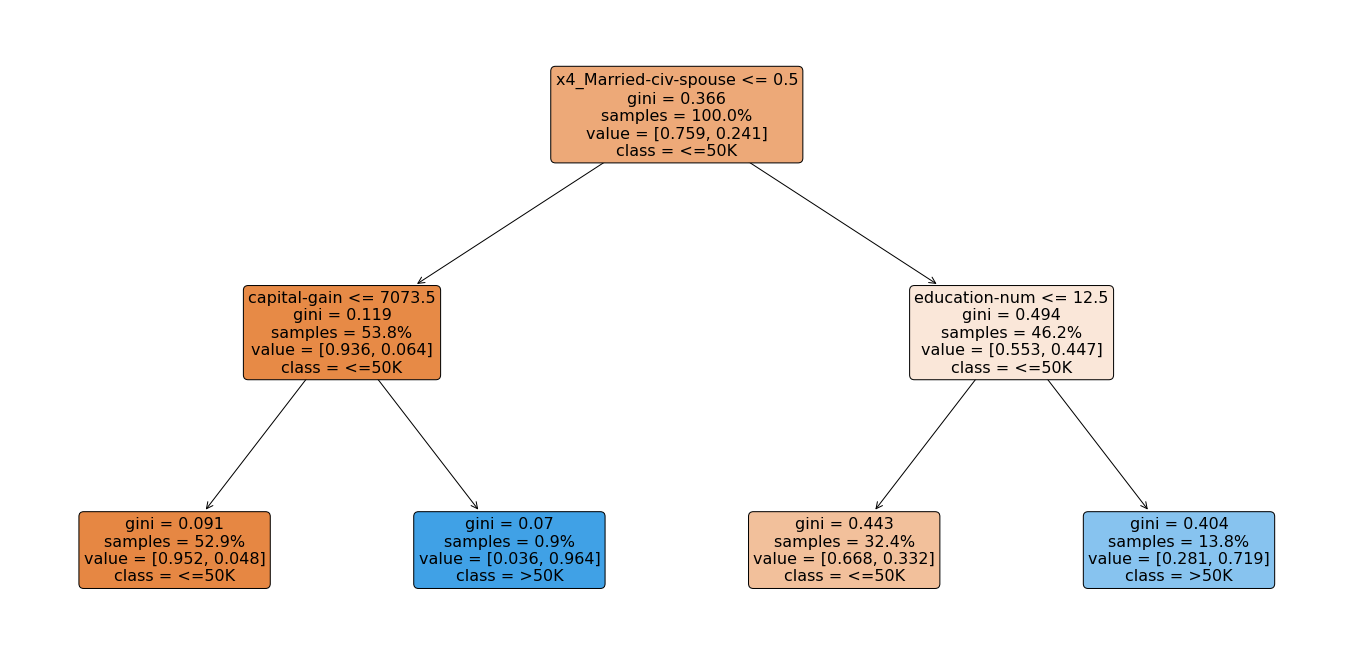

In [71]:
plt.figure(figsize=(24,12))
tree.plot_tree(arvore_2,
               feature_names=nomes_atributos,
               class_names=arvore_2.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=16)